In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg, interpolate, optimize, spatial

%matplotlib inline

In [54]:
import math as m
f = lambda x: m.sin(x / 5) * m.exp(x / 10) + 5 * m.exp(-x / 2)

In [68]:
def f(x):
    return m.sin(x / 5) * m.exp(x / 10) + 5 * m.exp(-x / 2)

In [69]:
x = np.arange(1,31,0.1)
y = np.array(list(map(f, x)))

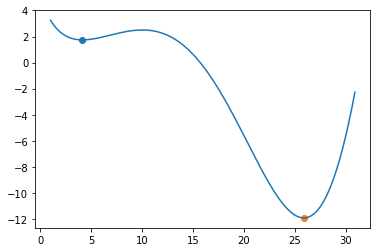

In [31]:
tries = [2,30]
for t in tries:
    minima = optimize.minimize(f, t, method='BFGS').x
    plt.scatter(minima, f(minima))

plt.plot(x,y,label='original')
plt.show()

In [33]:
answer1 = round(optimize.minimize(f, 2, method='BFGS').fun, 2)
answer2 = round(optimize.minimize(f, 30, method='BFGS').fun, 2)
line = ' '.join(list(map(str, [answer1, answer2])))
line

'1.75 -11.9'

In [34]:
file = open('submission1.txt', 'w', newline='')
file.write(line)
file.close()

Задача 3. Минимизация негладкой функции

Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).
Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [62]:
line=str(round(optimize.differential_evolution(f, [(0,30)]).fun,2))

In [65]:
with open('submission.txt', 'w', newline='') as file:
    file.write(line)

In [74]:
def h(x):
    return int(m.sin(x / 5) * m.exp(x / 10) + 5 * m.exp(-x / 2))

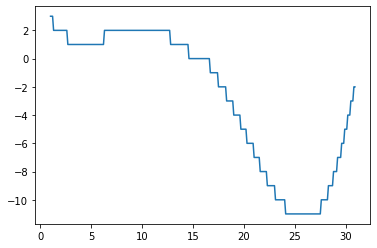

In [75]:
yint = list(map(h, x))
plt.plot(x,yint)
plt.show()

In [79]:
a=str(round(optimize.minimize(h, x0=30, method="BFGS").fun,2))

In [80]:
b=str(round(optimize.differential_evolution(h, [(1,30)]).fun,2))

In [82]:
line = ' '.join([a,b])
line

'-5 -11.0'

In [83]:
with open('submission.txt', 'w', newline='') as file:
    file.write(line)